In [22]:
from utils.preprocessing import BasicPreprocessPipeline
from scipy.stats import iqr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [20]:
pd.set_option('display.max_columns', 50)

In [ ]:
df_test = BasicPreprocessPipeline.run(pd.read_csv('data/sales_ads_test.csv'))
df_train = BasicPreprocessPipeline.run(pd.read_csv('data/sales_ads_train.csv'))
len(df_test), len(df_train)

In [ ]:
# Distribution of the price
plt.show(sns.displot(df_train.Cena))
print(f"Median : {df_train.Cena.quantile(0.5)}")
print(f"Quantile 90% : {df_train.Cena.quantile(0.9)}")
print(f"Top 10 : {df_train.Cena.sort_values(ascending=False).head(10).to_numpy()}")

In [ ]:
display(df_train.sort_values('Cena', ascending=False).head(2))  # The most severe ones
print(f"Average McLaren price : {df_train.groupby('Marka_pojazdu').agg({'Cena': 'mean'}).loc['McLaren', 'Cena']}")

Notes are that data is very skewed to the left. There are a few extreme target outliers, 
which will be hard to tackle during prediction (probable premium car brands).
Since top 2 cars are 3 times more expensive than the rest most expensive cars, they should
be excluded. They are too big of an outlier. Without augmentation it would be extremely hard
to take them into account. 

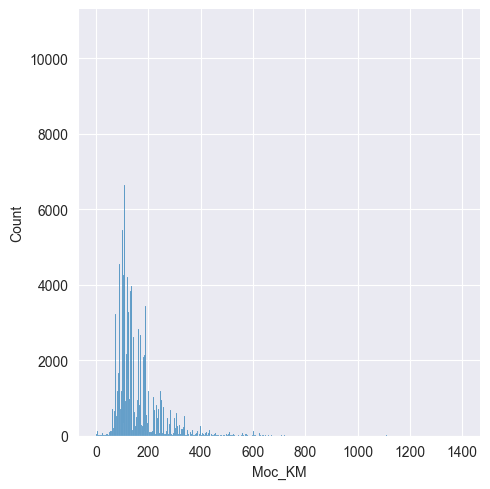

Top 10 horse power : [1398.0, 1236.0, 1203.0, 1111.0, 1111.0]
Top 10 horse power (Test) : [1398.0, 1300.0, 1236.0, 1115.0, 1000.0]
Top 10 horse power (Brands) : ['Volkswagen', 'Bentley', 'Renault', 'Ford', 'Buick']


In [15]:
plt.show(sns.displot(df_train.Moc_KM))
print(f"Top 10 horse power : {df_train.Moc_KM.sort_values(ascending=False).head(5).to_list()}")
print(f"Top 10 horse power (Test) : {df_test.Moc_KM.sort_values(ascending=False).head(5).to_list()}")
print(f"Top 10 horse power (Brands) : {df_train.sort_values('Moc_KM', ascending=False).Marka_pojazdu.head(5).to_list()}")

,ID,Waluta,Stan,Marka_pojazdu,Model_pojazdu,Wersja_pojazdu,Generacja_pojazdu,Rok_produkcji,Przebieg_km,Moc_KM,Pojemnosc_cm3,Rodzaj_paliwa,Emisja_CO2,Naped,Skrzynia_biegow,Typ_nadwozia,Liczba_drzwi,Kolor,Kraj_pochodzenia,Pierwszy_wlasciciel,Data_pierwszej_rejestracji,Data_publikacji_oferty,Lokalizacja_oferty,Wyposazenie,Wiek_oferty
50072,50073,PLN,Used,Chevrolet,Volt,NaN,NaN,2016,44600.0,1398.0,NaN,Electric,NaN,NaN,Automatic,sedan,5.0,red,United States,NaN,01/01/2017,2021-04-27,"Bezrzecze, gm. Dobra (Szczecińska), policki, Z...","[ABS, Electrically adjustable mirrors, Passeng...",221.0
46536,46537,PLN,Used,Suzuki,Grand Vitara,NaN,II (2005-2014),2007,212000.0,1300.0,1997.0,Diesel,NaN,4x4 (attached manually),Manual,SUV,5.0,black,NaN,NaN,NaN,2021-04-25,"Biała Podlaska, Lubelskie","[ABS, Electric front windows, Drivers airbag, ...",223.0
48987,48988,PLN,Used,Bentley,Other,NaN,NaN,1970,77000.0,1236.0,6700.0,Gasoline,NaN,NaN,Automatic,sedan,4.0,other,NaN,NaN,NaN,2021-01-05,"Starogard Gdański, starogardzki, Pomorskie","[ABS, Power steering, Leather upholstery, Elec...",333.0


,ID,Cena,Waluta,Stan,Marka_pojazdu,Model_pojazdu,Wersja_pojazdu,Generacja_pojazdu,Rok_produkcji,Przebieg_km,Moc_KM,Pojemnosc_cm3,Rodzaj_paliwa,Emisja_CO2,Naped,Skrzynia_biegow,Typ_nadwozia,Liczba_drzwi,Kolor,Kraj_pochodzenia,Pierwszy_wlasciciel,Data_pierwszej_rejestracji,Data_publikacji_oferty,Lokalizacja_oferty,Wyposazenie,Wiek_oferty
132975,132976,190199.0,PLN,New,Volkswagen,Passat,NaN,B8 (2014-),2021.0,1.0,1398.0,NaN,Hybrid,NaN,Front wheels,Automatic,sedan,5.0,black,NaN,NaN,NaN,2021-04-30,"ul. Radzymińska 78 - 03-752 Warszawa, Praga-Pó...","[ABS, Twilight sensor, Isofix, On-board comput...",218.0
86447,86448,55900.0,NaN,Used,Bentley,Other,NaN,NaN,NaN,77000.0,1236.0,6700.0,Gasoline,NaN,NaN,Automatic,sedan,4.0,other,NaN,NaN,NaN,2021-01-05,"Starogard Gdański, starogardzki, Pomorskie","[ABS, Power steering, Leather upholstery, Elec...",333.0
124210,124211,6600.0,PLN,Used,Renault,Espace,NaN,NaN,2007.0,191874.0,1203.0,1900.0,Diesel,NaN,Front wheels,Manual,minivan,5.0,blue,NaN,Yes,NaN,2021-04-26,"Staszica 2 - 64-030 Śmigiel, kościański, Wielk...","[ABS, CD, Twilight sensor, ESP(stabilization o...",222.0


IQR based range 6.0 : 270.0


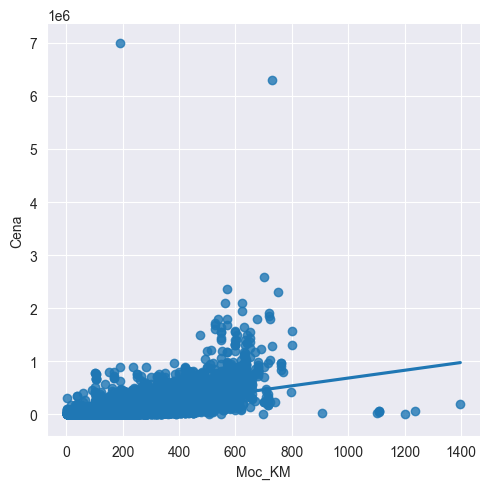

In [34]:
display(df_test.sort_values('Moc_KM', ascending=False).head(3))
display(df_train.sort_values('Moc_KM', ascending=False).head(3))
print(f"IQR based range {df_test.Moc_KM.quantile(0.25) - 1.5 * iqr(df_test.Moc_KM.values, nan_policy='omit')} : {df_test.Moc_KM.quantile(0.75) + 1.5 * iqr(df_test.Moc_KM.values, nan_policy='omit')}")
sns.lmplot(x="Moc_KM", y="Cena", data=df_train, ci=None)

There are Suzuki and Passat with extreme horse power values, which suggests the model should be robust to
outliers. Although, some values could be capped by IQR, it is very risky as it creates potential information loss.
Maybe log transformation would be better? Or blindly capping the value to e.g. 800-1_000 based on
the regression line.<br/><br/>
Finally, it can be seen that correlation between price and power is decent.

Top 10 mileage : [1111111111.0, 500000000.0, 206549168.0, 99999999.0, 11111111.0]
Top 10 mileage (Test): [500000000.0, 10000000.0, 9999999.0, 2930000.0, 2819436.0]
Top 10 mileage : [1111111111.0, 500000000.0, 206549168.0, 99999999.0, 11111111.0]
Quantile 90% mileage : 260000.0
IQR based range -176500.0 : 435500.0
Amount of IQR outliers : 380


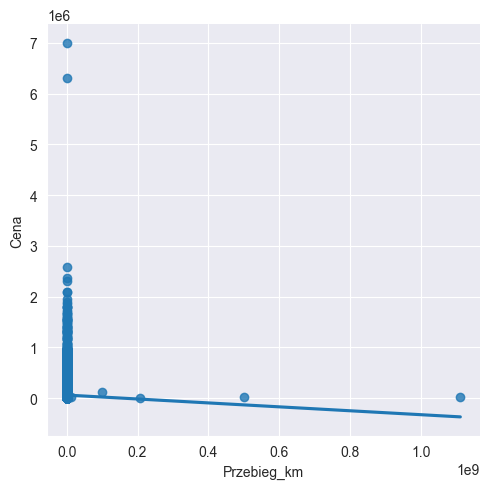

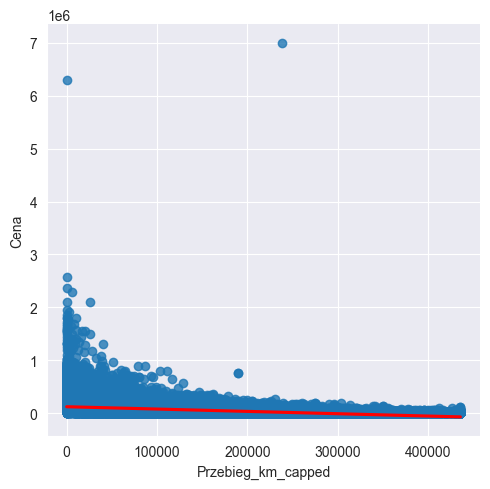

In [40]:
print(f"Top 10 mileage : {df_train.Przebieg_km.sort_values(ascending=False).head(5).to_list()}")
print(f"Top 10 mileage (Test): {df_test.Przebieg_km.sort_values(ascending=False).head(5).to_list()}")
print(f"Top 10 mileage : {df_train.sort_values('Przebieg_km', ascending=False).Przebieg_km.head(5).to_list()}")
print(f"Quantile 90% mileage : {df_train.Przebieg_km.quantile(0.9)}")
print(f"IQR based range {df_train.Przebieg_km.quantile(0.25) - 1.5 * iqr(df_train.Przebieg_km.values, nan_policy='omit')} : {df_train.Przebieg_km.quantile(0.75) + 1.5 * iqr(df_train.Przebieg_km.values, nan_policy='omit')}")
max_value = df_train.Przebieg_km.quantile(0.75) + 1.5 * iqr(df_train.Przebieg_km.values, nan_policy='omit')
print(f"Amount of IQR outliers : {df_train[df_train.Przebieg_km > max_value].shape[0]}")
sns.lmplot(x="Przebieg_km", y="Cena", data=df_train, ci=None)  # Ci will look ridiculous here
df_train.loc[:, 'Przebieg_km_capped'] = df_train.Przebieg_km.to_numpy()
df_train.loc[df_train.Przebieg_km > max_value, 'Przebieg_km_capped'] = max_value
sns.lmplot(x="Przebieg_km_capped", y="Cena", data=df_train, ci=None, line_kws={'color': 'red'})
df_train.drop(columns='Przebieg_km_capped', inplace=True)

Here, on the other hand cutting the mileage based on the IQR might work. It can be seen that outliers are so big
that is hard to see the correlation. After capping the value correlation is much clearer and it can be seen
that for larger values of mileage it is decent.<br/></br>
Nonetheless, it will not help with small values.

In [ ]:
plt.show(sns.displot(df_train.Rok_produkcji))
print(f"Top 10 age : {df_train.Rok_produkcji.sort_values().head(5).to_list()}")
print(f"Top 10 age brands : {df_train.sort_values('Rok_produkcji', ascending=False).Marka_pojazdu.head(5).to_list()}")

In [ ]:
df_train.sort_values('Moc_KM', ascending=False).head(5)